# 수학과 파이썬 복습

## 벡터와 행렬

In [13]:
import numpy as np

x = np.array([1, 2, 3])
x, x.shape, x.ndim

(array([1, 2, 3]), (3,), 1)

In [19]:
x.__class__

numpy.ndarray

In [14]:
x2 = x.reshape(-1, 1)
x2,

(array([[1],
        [2],
        [3]]),)

In [15]:
x2.shape

(3, 1)

In [16]:
x2.ndim

2

In [17]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [18]:
W.ndim

2

In [20]:
W.__class__

numpy.ndarray

## 행렬의 원소별 연산

In [21]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [22]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [24]:
W@X.T

array([[ 8, 26],
       [17, 62]])

## 브로드캐스트

In [25]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [26]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 100])
A * b

array([[ 10, 200],
       [ 30, 400]])

## 벡터의 내적과 행렬의 곱

In [27]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a,b)

32

In [28]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.matmul(A, B)

array([[19, 22],
       [43, 50]])

In [29]:
A@B

array([[19, 22],
       [43, 50]])

In [30]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

# 신경망의 추론

## 신경망 추론 전체 그림

In [31]:
import numpy as np

In [33]:
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1
h.shape

(10, 4)

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [36]:
a = sigmoid(h)

In [37]:
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

In [38]:
s = np.matmul(a, W2) + b2
s.shape

(10, 3)

## 계층으로 클래스화 및 순전파 구현

In [39]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [40]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [41]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [42]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [43]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [44]:
s.shape

(10, 3)

# 신경망의 학습

## 손실 함수

In [46]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]

    cross_entropy = np.log(y[np.arange(batch_size), t] + 1e-7)
    loss = -np.sum(cross_entropy) / batch_size
    
    return loss

In [47]:
class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None  # sigmoid의 출력
        self.t = None  # 정답 데이터

    def forward(self, x, t):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))

        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t) # No에 대한 확률, Yes에 대한 확률

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx

## 계산 그래프

*Repeat 노드*

In [48]:
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)
x.shape

(1, 8)

In [49]:
y = np.repeat(x, N, axis=0)
y.shape

(7, 8)

In [51]:
dy = np.random.randn(N, D)
dy.shape

(7, 8)

In [53]:
dx = np.sum(dy, axis=0, keepdims=True)
dx.shape

(1, 8)

In [54]:
dx = np.sum(dy, axis=0, keepdims=False)
dx.shape

(8,)

*Sum 노드*

In [56]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
x.shape

(7, 8)

In [57]:
y = np.sum(x, axis=0, keepdims=True)
y.shape

(1, 8)

In [58]:
dy = np.random.randn(1, D)
dy.shape

(1, 8)

In [59]:
dx = np.repeat(dy, N, axis=0)
dx.shape

(7, 8)

*MatMul 노드*

In [60]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.prams 
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.amtmulself.x.T, dout
        self.grads[0][...] = dW
        return dx

In [66]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a = b
a is b

True

In [67]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a[...] = b
a is b

False

## 기울기 도출과 역전파 구현

*Sigmoid 계층*

In [69]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out)*self.out
        return dx

*Affine 계층*

In [70]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

*Softmax with Loss 계층*

In [72]:
def softmax(x):
    if x.ndim == 2:
        # overflow를 막기 위해 입력값 중 
        # 최대값을 빼준다. >> 밑러닝-1, 3.5.2 참고
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

In [71]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        # cross_entropy_error()에 이미 있어서 굳이 필요 없을 듯
        if self.t.size == self.y.size:
            self.t = self.t. argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx

## 가중치 갱신

In [73]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr= lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

# 신경망으로 문제를 풀다

## 스파이럴 데이터셋

In [1]:
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
x.shape, t.shape

((300, 2), (300, 3))

## 학습용 코드

In [11]:
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

In [12]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [17]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [18]:
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [19]:
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [20]:
from tqdm import tqdm

In [23]:
for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size : (iters+1)*batch_size]
        batch_t = t[iters*batch_size : (iters+1)*batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters+1)%10 == 0:
            avg_loss = total_loss / loss_count
            print(f'epoch : {epoch +1}, iters : {iters+1}/{max_iters}, loss : {avg_loss}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

epoch : 1, iters : 10/10, loss : 1.1256062166823237
epoch : 2, iters : 10/10, loss : 1.1255202354489933
epoch : 3, iters : 10/10, loss : 1.1162613752115285
epoch : 4, iters : 10/10, loss : 1.1162867078413503
epoch : 5, iters : 10/10, loss : 1.1123000112951948
epoch : 6, iters : 10/10, loss : 1.1384639824108038
epoch : 7, iters : 10/10, loss : 1.1590961883070312
epoch : 8, iters : 10/10, loss : 1.1086316143023154
epoch : 9, iters : 10/10, loss : 1.1173305676924539
epoch : 10, iters : 10/10, loss : 1.1287957712269248
epoch : 11, iters : 10/10, loss : 1.1168438089353867
epoch : 12, iters : 10/10, loss : 1.108338779101816
epoch : 13, iters : 10/10, loss : 1.087614920049946
epoch : 14, iters : 10/10, loss : 1.0766813865819347
epoch : 15, iters : 10/10, loss : 1.0442376735950387
epoch : 16, iters : 10/10, loss : 1.034578262633777
epoch : 17, iters : 10/10, loss : 0.9572932039643971
epoch : 18, iters : 10/10, loss : 0.9183853210879447
epoch : 19, iters : 10/10, loss : 0.9241491096212101
epoch

epoch : 211, iters : 10/10, loss : 0.1517051939074466
epoch : 212, iters : 10/10, loss : 0.14755917786826167
epoch : 213, iters : 10/10, loss : 0.14785145742055816
epoch : 214, iters : 10/10, loss : 0.14515980626797967
epoch : 215, iters : 10/10, loss : 0.14678399383604496
epoch : 216, iters : 10/10, loss : 0.14388363320088363
epoch : 217, iters : 10/10, loss : 0.14259768661059324
epoch : 218, iters : 10/10, loss : 0.14555184796511328
epoch : 219, iters : 10/10, loss : 0.13922422236572768
epoch : 220, iters : 10/10, loss : 0.13730944343188065
epoch : 221, iters : 10/10, loss : 0.14410598841352623
epoch : 222, iters : 10/10, loss : 0.14050778228166325
epoch : 223, iters : 10/10, loss : 0.14224984249809608
epoch : 224, iters : 10/10, loss : 0.1425464066689685
epoch : 225, iters : 10/10, loss : 0.13667202381979068
epoch : 226, iters : 10/10, loss : 0.13659011900484852
epoch : 227, iters : 10/10, loss : 0.1425166520507039
epoch : 228, iters : 10/10, loss : 0.13608657183237466
epoch : 229, 

In [25]:
import matplotlib.pyplot as plt


def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    elif system_name == "Linux":
        font_family = "NanumGothic"
    return font_family


font_family = get_font_family()
plt.style.use('seaborn')
plt.rc("font", family=font_family)
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format='retina'

/tmp/ipykernel_2412482/1826209167.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


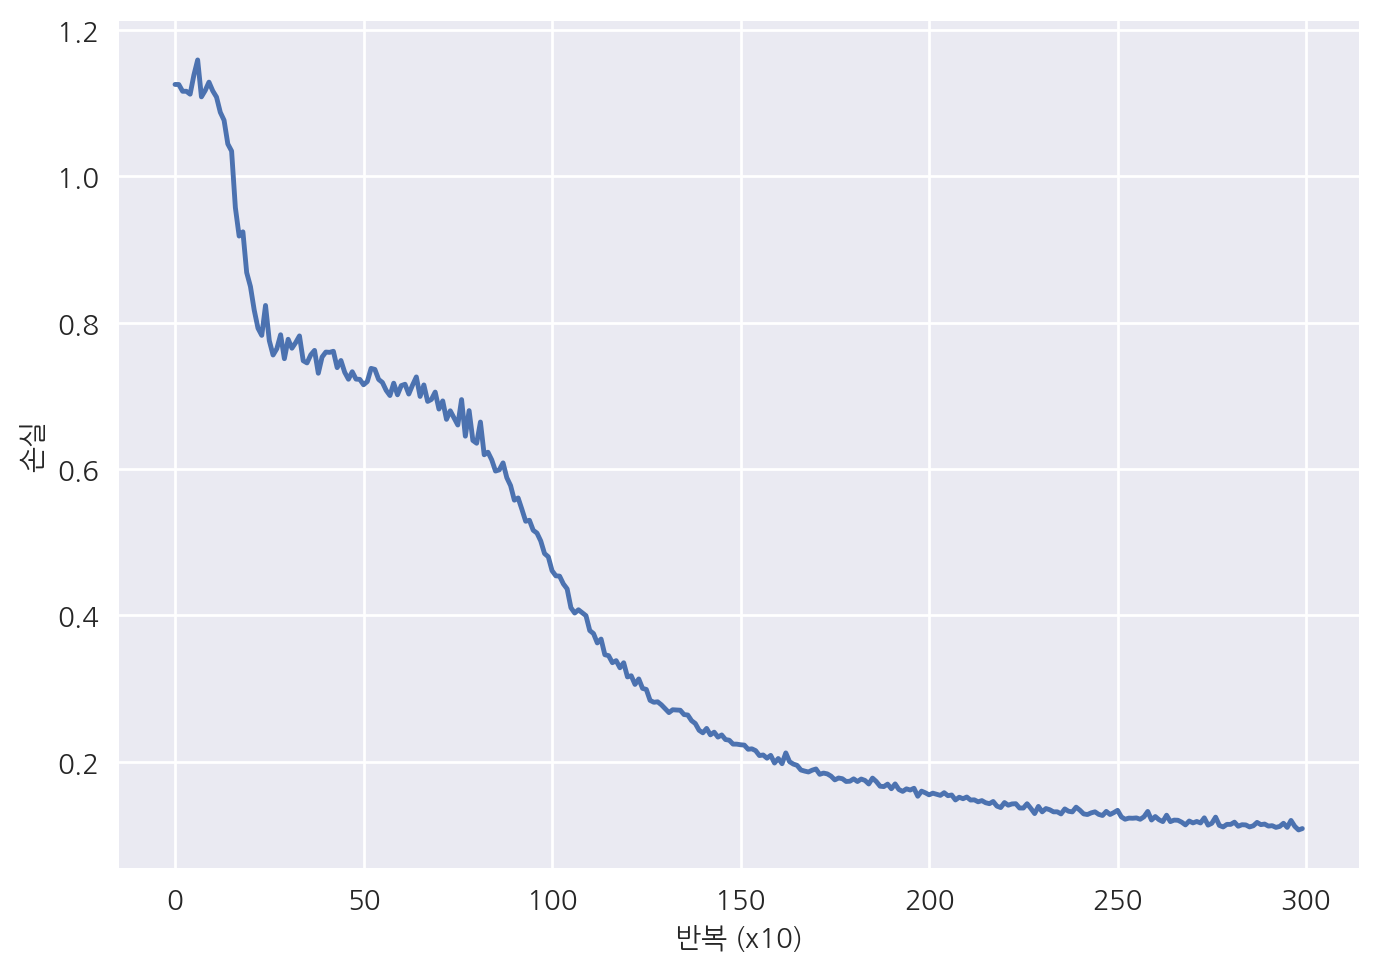

In [26]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

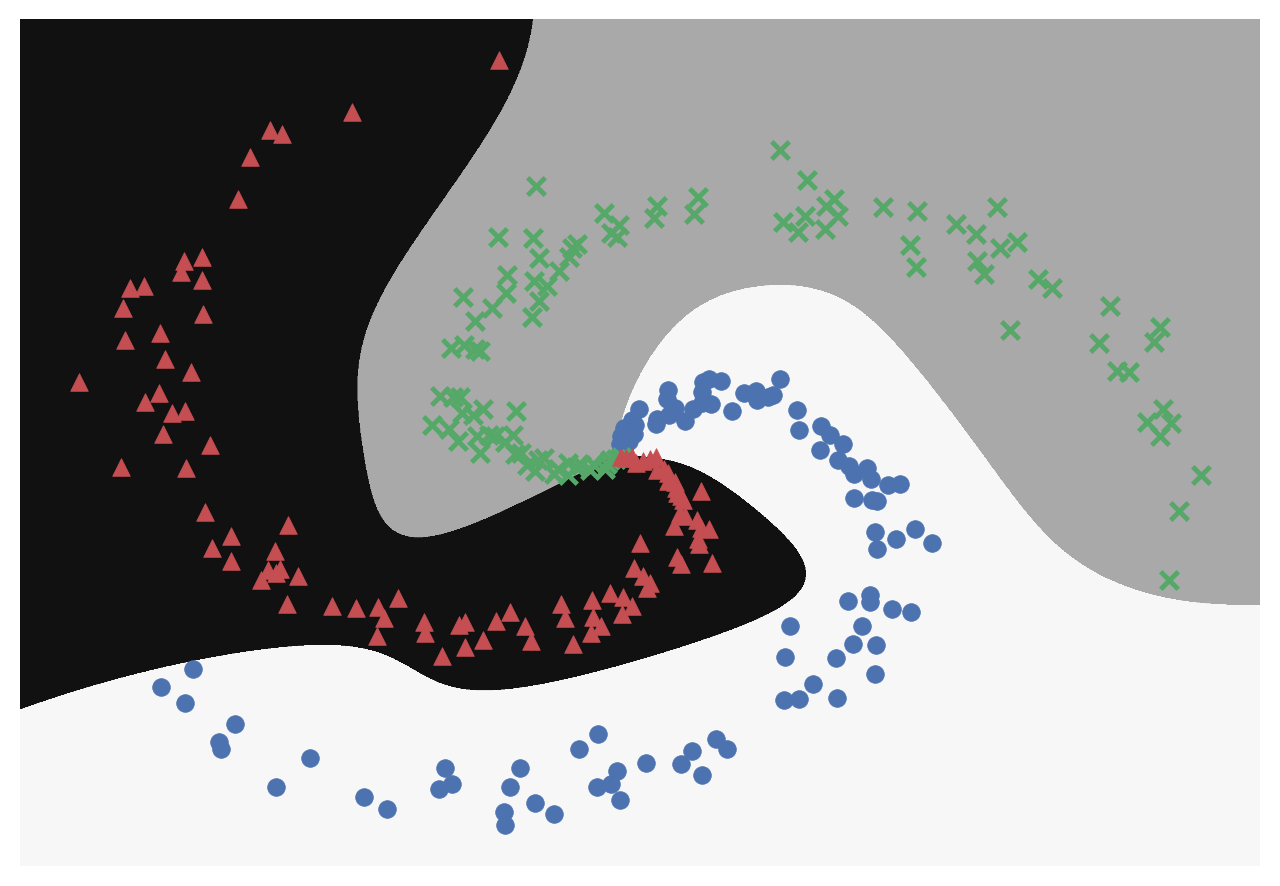

In [29]:
# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## Trainer 클래스

In [35]:
from common.trainer import Trainer
from common.optimizer import SGD
from dataset import spiral

import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [36]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [37]:
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [38]:
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 202 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 203 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 204 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 205 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 206 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 207 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 208 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 209 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 210 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 211 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 212 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 213 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 214 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 215 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 216 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 217 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 218 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 219 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 220 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 221 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 222 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 223 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 224 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 225 |  반복 1 / 10 | 시간 0[s] | 

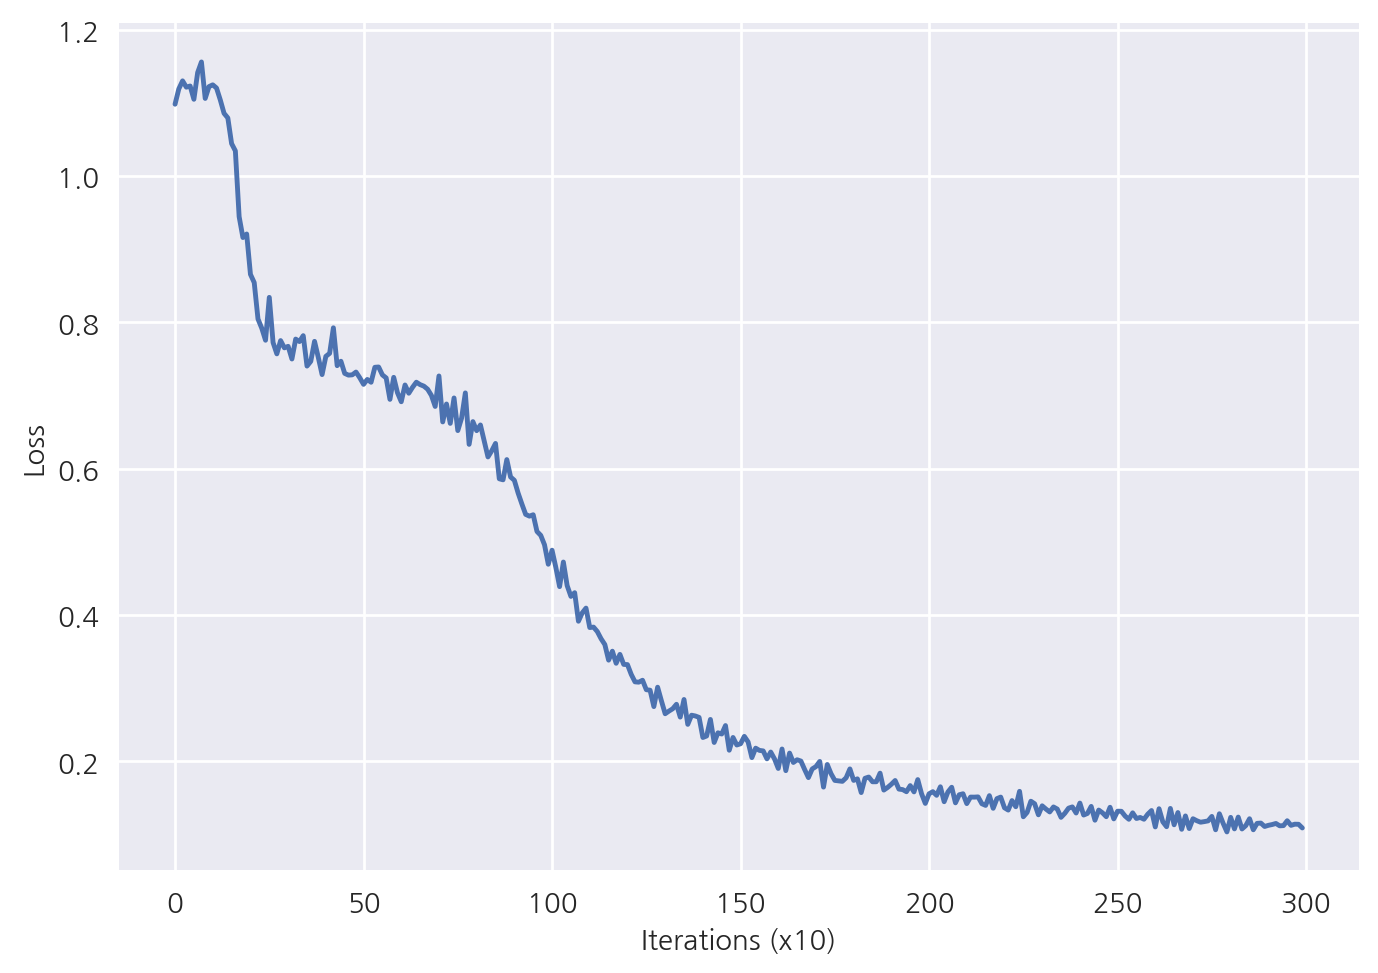

In [39]:
trainer.plot()

# 계산 고속화

## 비트 정밀도

In [40]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [42]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [43]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

## GPU(쿠파이)

In [48]:
# !pip install cupy-cuda11x

In [47]:
import cupy as cp

In [50]:
# x = cp.arange(6).reshape(2, 3).astype('f')
# x